In [1]:
#Importing necessary libraries
import numpy as np
import random
import string # to process standard python strings

import warnings
warnings.filterwarnings("ignore")

# first-time use only
# !pip install nltk
# Natural Language Tool Kit
import nltk 
nltk.download('punkt')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [130]:
#all packages 
import nltk 
import string 
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from bs4 import BeautifulSoup
nltk.download('stopwords')
import string #has the list of all punctuations
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [250]:
import pandas as pd
df = pd.read_csv("parents.csv",encoding='latin-1')

In [251]:
df2 = df #copy

In [252]:
stop_w = stopwords.words('english')

In [253]:
def clean(column,df,stopwords=False):
  #remove stop words
  df[column] = df[column].apply(str)
  df[column] = df[column].str.lower().str.split()
  if stopwords:
        df[column]=df[column].apply(lambda x: [item for item in x if item not in stop_w])
  #remove punctuation
  df[column]=df[column].apply(lambda x: [item for item in x if item not in string.punctuation])
  df[column]=df[column].apply(lambda x: " ".join(x))

In [254]:
# from nltk.stem.wordnet import WordNetLemmatizer
# wordnet_lemmatizer = WordNetLemmatizer()
# df2['answerText']= df2.answerText.apply(data_preparation)

In [255]:
clean('questionText',df2) #kept stopwords

In [256]:
df2=df2.fillna(0)

In [257]:
questions = df2["questionText"].to_list()

In [258]:
# res='\n'.join(questions)
# res

In [259]:
# res.lower()

In [260]:
# clean('answerText',df2,stopwords=True)
answers = df2["answerText"].to_list()
sent_tokens =questions
ans_sent_tokens=answers

In [261]:
# answers='\n'.join(answers)
# questions='\n'.join(questions)
# answers

In [262]:
import re
# answers=re.sub("[^a-zA-Z]", " ",str(answers))
# questions=re.sub("[^a-zA-Z]", " ",str(questions))
ques=[]
ans=[]
for i in questions:
    ques.append(i)
for j in answers:
    ans.append(j)

In [263]:
# ans_sent_tokens = nltk.sent_tokenize(answers)
# sent_tokens = nltk.sent_tokenize(questions)# converts to list of faq sentences 
# # word_tokens = nltk.word_tokenize(res)

In [264]:
# print(ans_sent_tokens)

In [265]:
print("Total number of answers ",len(ans))
print("Total number of FAQs ",len(ques))
sent_tokens =ques
ans_sent_tokens=ans

Total number of answers  704
Total number of FAQs  704


In [266]:
print("FAQs in faq.txt file ")
ques

FAQs in faq.txt file 


['why does my elder son get scared so easily? my elder son seems to be in stress and have fear of starting to do a work .what should i do?',
 'why does my elder daughter get scared so easily? my elder daughter seems to be in stress and have fear of starting to do a work .what should i do?',
 'why does my daughter get scared so easily? my daughter seems to be in stress and have fear of starting to do a work .what should i do?',
 'why does my younger daughter get scared so easily? my younger daughter seems to be in stress and have fear of starting to do a work .what should i do?',
 'why does my middle daughter get scared so easily? my middle daughter seems to be in stress and have fear of starting to do a work .what should i do?',
 'why does my younger son get scared so easily? my younger son seems to be in stress and have fear of starting to do a work .what should i do?',
 'why does my middle son get scared so easily? my middle son seems to be in stress and have fear of starting to do a

In [267]:
print("Answers in ans.txt file ")
ans

Answers in ans.txt file 


["Most fears are a normal, natural part of childhood. However, if a child is afraid all the time, or has fears that stop them from having fun or interfere with their daily life,\xa0this could be a sign of anxiety\xa0and it may be time to get some professional help. Don't give more pressure to your son as he is your eldest , he may be afraid to handle so much resposibilities.",
 "Most fears are a normal, natural part of childhood. However, if a child is afraid all the time, or has fears that stop them from having fun or interfere with their daily life,\xa0this could be a sign of anxiety\xa0and it may be time to get some professional help. Don't give more pressure to your daughter , she may be afraid to handle so much resposibilities. ",
 "Most fears are a normal, natural part of childhood. However, if a child is afraid all the time, or has fears that stop them from having fun or interfere with their daily life,\xa0this could be a sign of anxiety\xa0and it may be time to get some profess

In [268]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]


#Remove punctuctions
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    text = text.lower()
    clean_text = text.translate(remove_punct_dict)
    words = nltk.word_tokenize(clean_text)
    return LemTokens(words)


In [269]:
#Greeting messages
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

#function to generate random greetings
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [271]:
from sklearn.metrics.pairwise import cosine_similarity
# every sentence --> vector
# similarity between vectors :: angle between vectors :: cosine :: 
# why cosine :: cosine(90) : 0 , cosine(0) = 1 :: cosine(180) = -1

In [272]:
length=len(sent_tokens)
def response(user_response,sent_tokens):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
#     print(len(sent_tokens))
#     print(idx)
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
#     print(req_tfidf)
    if(req_tfidf>=1):
        robo_response = robo_response+sent_tokens[idx]
        if idx<length:
            
            req_tfidf=1
            if ans_sent_tokens[idx]:
                print(ans_sent_tokens[idx])
                return ans_sent_tokens[idx],req_tfidf
            else:
                return 0,req_tfidf
        else:
            robo_response="I am sorry! I don't understand you"
            req_tfidf=0
            return robo_response,req_tfidf        
        
    else:
        robo_response="I am sorry! I don't understand you"
        req_tfidf=0
        return robo_response,req_tfidf
        
        
        

In [273]:
flag=True

true_prediction=0
false_prediction=0
accuracy=0
for i in ques[0:500]:
    user_response = i
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("GOD: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("GOD: "+greeting(user_response))
            else:
                print("GOD: ",end="")
                res,accuracy=response(user_response,ques)
                
                sent_tokens=[]
                
                if res == None:
                    false_prediction=false_prediction+1
                else:
                    true_prediction=true_prediction+1
                    if accuracy ==1:
                        accuracy=accuracy+1
                        
    else:
        flag=False
        print("GOD: Bye! take care..")
        
print("true_prediction",true_prediction)
print("false_prediction",false_prediction)

GOD: Most fears are a normal, natural part of childhood. However, if a child is afraid all the time, or has fears that stop them from having fun or interfere with their daily life, this could be a sign of anxiety and it may be time to get some professional help. Don't give more pressure to your son as he is your eldest , he may be afraid to handle so much resposibilities.
GOD: Most fears are a normal, natural part of childhood. However, if a child is afraid all the time, or has fears that stop them from having fun or interfere with their daily life, this could be a sign of anxiety and it may be time to get some professional help. Don't give more pressure to your daughter , she may be afraid to handle so much resposibilities. 
GOD: Most fears are a normal, natural part of childhood. However, if a child is afraid all the time, or has fears that stop them from having fun or interfere with their daily life, this could be a sign of anxiety and it may be time to get some professional help. D

GOD: It's so sad that they are thinking about their past decisions, but yeah... Everyone will think about that atleast one if I have done it my life would be better but the sad reality is past is past so we can't change the past but we can change the future make your child to remember one thing if this thought comes its never too late to start .We can change our lives at stage but it requires patience and determination , a will power to win give that confidence to your child, Don't worry everything will be okay.
GOD: It's so sad that they are thinking about their past decisions, but yeah... Everyone will think about that atleast one if I have done it my life would be better but the sad reality is past is past so we can't change the past but we can change the future make your child to remember one thing if this thought comes its never too late to start .We can change our lives at stage but it requires patience and determination , a will power to win give that confidence to your child, D

GOD: Your child is experiencing  Post-traumatic stress disorder (PTSD) is a mental health condition that's triggered by a terrifying event  either experiencing it or witnessing it. Does trauma go away? No, but with effective evidence-based treatment, symptoms can be managed well and can remain dormant for years, even decades. But because the trauma that evokes the symptoms will never go away, there is a possibility for those symptoms to be triggered again in the future. But the possible solution to reduce it is Ask them to give themself some time, Talk about the event and cool down them, make them to speak with others that have experienced the same thing as them, and Avoid spending lots of time alone, Stick to  routine, Consider seeking professional help,Notice how they're feeling
GOD: Your child is experiencing  Post-traumatic stress disorder (PTSD) is a mental health condition that's triggered by a terrifying event  either experiencing it or witnessing it. Does trauma go away? No

GOD: It's so sad that they are thinking about their past decisions, but yeah... Everyone will think about that atleast one if I have done it my life would be better but the sad reality is past is past so we can't change the past but we can change the future make your child to remember one thing if this thought comes its never too late to start .We can change our lives at stage but it requires patience and determination , a will power to win give that confidence to your child, Don't worry everything will be okay. Keep moving forward
GOD: It's so sad that they are thinking about their past decisions, but yeah... Everyone will think about that atleast one if I have done it my life would be better but the sad reality is past is past so we can't change the past but we can change the future make your child to remember one thing if this thought comes its never too late to start .We can change our lives at stage but it requires patience and determination , a will power to win give that confide

GOD: When children are unable to speak around certain people or in certain settings, they may have an anxiety disorder called selective mutism (SM). It is common for kids with SM to be very chatty at home with family but silent at school.Personality  emotionally sensitive and easily intimidated babies are more likely to grow up to be shy children. Learned behaviour  children learn by imitating their most influential role models: their parents. Shy parents may 'teach' shyness to their children by example.What may appear as shyness actually has its roots based in anxiety, specifically an underlying fear of the expectation to talk Shy kids may not volunteer to read aloud to the class, but when they need to do things, they can. Encourage your child to talk with others
GOD: When children are unable to speak around certain people or in certain settings, they may have an anxiety disorder called selective mutism (SM). It is common for kids with SM to be very chatty at home with family but si

GOD: People often confuse shyness and introversion. Confusing the two can have some important outcomes if a parent of a child doesnt know the difference.Shy children typically want to be more social but they cant muster the right behavior because they become so anxious and, consequently, paralyzed. Not so with introverts who just have quieter interests than their more extraverted peers. A parent will want to help a shy child, but support an introverted child.So observe your child's behaviour and come to a result.
GOD: People often confuse shyness and introversion. Confusing the two can have some important outcomes if a parent of a child doesnt know the difference.Shy children typically want to be more social but they cant muster the right behavior because they become so anxious and, consequently, paralyzed. Not so with introverts who just have quieter interests than their more extraverted peers. A parent will want to help a shy child, but support an introverted child.So observe you

GOD: Being considerate is good but Too much of anything is good for nothing, So ask your child to voice out their opinion , May be it is because they lack self confidence , they may have the fear if they say no they will lose that person give the confidence to speak their heart out it is totaly not wrong.
GOD: GOD: Being considerate is good but Too much of anything is good for nothing, So ask your child to voice out their opinion , May be it is because they lack self confidence , they may have the fear if they say no they will lose that person give the confidence to speak their heart out it is totaly not wrong.
GOD: Being considerate is good but Too much of anything is good for nothing, So ask your child to voice out their opinion , May be it is because they lack self confidence , they may have the fear if they say no they will lose that person give the confidence to speak their heart out it is totaly not wrong.
GOD: Being considerate is good but Too much of anything is good for nothin

GOD: First you try to accept them as they are .When your children come out to you about their gender identity or sexuality, it can be a big step for them. One that's filled with fear, anxiety about your reaction, and hope that you will love them no matter what you are about to say. You need to believe your child and make this known to them. It is easy to assume clichés or go into a space of denial by saying things like "it's just a phase" or "they're confused," especially if your child is young. However, saying these words can irreparably damage your relationship with them. If these are your first thoughts, you will need to work through this in your own time, but your child needs to see that you believe in them. Inspite of that if your child is step/half child be more delicate to them as it is a more sensitive issue
GOD: First you try to accept them as they are .When your children come out to you about their gender identity or sexuality, it can be a big step for them. One that's filled

GOD: Dont pressure your child but please make them finish their studies make them to set it as their backup plan .Let them do their dream career part time untill they complete the studies .After graduation they can take the final choice. Support your child at that time
GOD: Tell them to not lose the opportunity they have got because many will not get this opportunity itself past is past no one can change it but future can be changed.Tell them to work hard now onwards to get placed in a good company or getting selected in highly reputed college for pg. Always their own hardwork will be with them last
GOD: Tell them to not lose the opportunity they have got because many will not get this opportunity itself past is past no one can change it but future can be changed.Tell them to work hard now onwards to get placed in a good company or getting selected in highly reputed college for pg. Always their own hardwork will be with them last.Tell tem to chose the field they wanted in the present 

GOD: Overly dependent children who aren't emotionally prepared for this independent growth show visible signs. They may cling to secure "anchors," such as a parent, friend, or teacher, and have great difficulty adjusting to a substitute or the unpleasantness of circumstances at school.This mostly can be classified for single child and also others.So you just encourage them to mingle with others,Recognize and validate the child's feelings. ...
Comfort them. ...
Don't ignore them, leave them, or force them to interact with what is stressing them. ...
Prepare them before a new experience. ...
Check any of your actions that enable clinginess.
GOD: Yes it is 100% accepted that your daughter feels this way because generally women are given less priority  especially in india so encourage your daughter to not leave education for any cost because it is the only tool to succed and by that she can bring changes in next generation girl child future.Please don't compromise your daughter's education

GOD: Separation and divorce are emotionally difficult events, but it is possible to have a healthy breakup.The end of a marriage typically unleashes a flood of emotions including anger, grief, anxiety and fear. Sometimes these feelings can rise up when you least expect them, catching you off guard. Such a response is normal, and over time the intensity of these feelings will subside. In the meantime, be kind to yourself. Researchers have found that people who are kind and compassionate to themselves have an easier time managing the day-to-day difficulties of divorce.Try not to think of the breakup as a battle. Divorce mediation is often a good alternative to courtroom proceedings. Trying to work things out yourself can be frustrating and self-defeating as the problems that contributed to your divorce are likely to re-emerge during divorce negotiations. Research shows that mediation can be beneficial for emotional satisfaction, spousal relationships and childrens needs.Divorce can be a

GOD: There will be fights among every friends because everyone has their own thoughts and standards when it clashes fight occurs so it takes time to settle tell them to give some time and move on thinking about it does not change if the mistake is theirs tell them to ask sorry
GOD: There will be fights among every friends because everyone has their own thoughts and standards when it clashes fight occurs so it takes time to settle tell them to give some time and move on thinking about it does not change if the mistake is theirs tell them to ask sorry
GOD: There will be fights among every friends because everyone has their own thoughts and standards when it clashes fight occurs so it takes time to settle tell them to give some time and move on thinking about it does not change if the mistake is theirs tell them to ask sorry
GOD: Ensure them that no matter what you will be there for them ,distract them, put them in groups to mingle with others
GOD: Ensure them that no matter what you will

GOD: Most children and teens who play video games do not become addicted or have other problems. But when gaming starts to get in the way of other parts of life, it's time to step in. If your child or teen resists your efforts to cut back on gaming, call your pediatrician for advice.
GOD: Most children and teens who play video games do not become addicted or have other problems. But when gaming starts to get in the way of other parts of life, it's time to step in. If your child or teen resists your efforts to cut back on gaming, call your pediatrician for advice.
GOD: Most children and teens who play video games do not become addicted or have other problems. But when gaming starts to get in the way of other parts of life, it's time to step in. If your child or teen resists your efforts to cut back on gaming, call your pediatrician for advice.
GOD: Most children and teens who play video games do not become addicted or have other problems. But when gaming starts to get in the way of othe

GOD: All children do that decrease the amount of time they watch gradually join them in any sports activities , don't make them sit idle distract them
GOD: All children do that decrease the amount of time they watch gradually join them in any sports activities , don't make them sit idle distract them
GOD: Maybe due to bullying or sexual abuse it happens or not willing to study that course, not getting friends these maybe the possible reasons.Ask them which category the problem comes and asure them you will support them .So tell them to finish the basic requirements they need as individual basic qualification as a backup and then they can go for their dreams.Tell them to give a shot.Take serious actions for bullying and sexual abuse 
GOD: Maybe due to bullying or sexual abuse it happens or not willing to study that course, not getting friends these maybe the possible reasons.Ask them which category the problem comes and asure them you will support them .So tell them to finish the basic 

GOD:  Nothing is more important than open communication between parent and child  especially when it comes to sexuality and gender identity. So before anything else, you might want to try drawing your son out. You could ask, What made you curious about this?.It is attraction so you can see some signs of them talking about that topic so open up to your child
GOD:  Nothing is more important than open communication between parent and child  especially when it comes to sexuality and gender identity. So before anything else, you might want to try drawing your son out. You could ask, What made you curious about this?.It is attraction so you can see some signs of them talking about that topic so open up to your child
GOD:  Nothing is more important than open communication between parent and child  especially when it comes to sexuality and gender identity. So before anything else, you might want to try drawing your child out. You could ask, What made you curious about this?.It is attr

GOD: Listen to them calmly and speak to them with calmness
GOD: Children normally feel that so try to things together for everyone 
GOD: Children normally feel that so try to things together for everyone 
GOD: Children normally feel that so try to things together for everyone 
GOD: Specific signs that a child might be developing an inferiority complex include: Generally avoiding eye contact. Being overly critical of themselves and others. Often referring to themselves as unlucky.Let them know that they are not defined by what other people say about them nor are they defined by what they believe to be true about themselves. Instead, help them see the beauty in who they are. "Encourage, build-up, and help your child learn to value their uniqueness,".
GOD: Specific signs that a child might be developing an inferiority complex include: Generally avoiding eye contact. Being overly critical of themselves and others. Often referring to themselves as unlucky.Let them know that they are not def

GOD: Keep offering healthy meals at regular times through the day. If your child won't eat or won't eat whole meals, you could try reducing the amount you're offering. 
GOD: Keep offering healthy meals at regular times through the day. If your child won't eat or won't eat whole meals, you could try reducing the amount you're offering. 
GOD: Keep offering healthy meals at regular times through the day. If your child won't eat or won't eat whole meals, you could try reducing the amount you're offering. 
GOD: Maybe they are handling stress ask your kid to have a fear to complete the task but don't have over fear whether it will be completed or not .Seek professional help
GOD: Maybe they are handling stress ask your kid to have a fear to complete the task but don't have over fear whether it will be completed or not .Seek professional help
GOD: Maybe they are handling stress ask your kid to have a fear to complete the task but don't have over fear whether it will be completed or not .Seek p

GOD: Spend at least half an hour daily and when the interest increases then gradually increase the time start with their easy subject and allow them to play more physically it refreshes the mind .Take them outside may be any function refresh their minds often
GOD: Spend at least half an hour daily and when the interest increases then gradually increase the time start with their easy subject and allow them to play more physically it refreshes the mind .Take them outside may be any function refresh their minds often
GOD: Discliping the children is the most hardest but make them practice first it will be hard for them but it gradually be okay for them .Tell them to do their own work .Normally if we practice a habit for a month it will automatically come with day to day routine so try that
GOD: Discliping the children is the most hardest but make them practice first it will be hard for them but it gradually be okay for them .Tell them to do their own work .Normally if we practice a habit f

GOD: It may be because she may have bad opnioin on your family and any events related to that would have happen so ask the issues and solve it
GOD: Its because they are experiencing pain in their life so they will connect with the villan back story so refresh your kid engage her mind, and solve the issues she/he is having
GOD: Its because they are experiencing pain in their life so they will connect with the villan back story so refresh your kid engage her mind, and solve the issues she/he is having
GOD: Its because your husband may be abusive , or anyother liked person of her as she is watching these from her childhood it will register deeply to her and she strat to believe that abusive is okay but advise her it is not okay accepting pain is sel destructive at one stage if she realizes it can't be brought back so do it now if not her marriage life will be dificult
GOD: Your child is also in growing stage so give that space and tell to assist you don't give all your work to him
GOD: Yo

GOD: It is because of the complex they think you don't know anything prove your child that you know and have many experience than them .Be brave and bold infront of them 
GOD: Its because of the fear of getting scolded tell them you will not do anything if they regret their wrong doings
GOD: Normaly teenage phase in a person life is a emotional rollar coaster so be careful when you deal with .If you say somethinng like 'I already told you' when something gets failed they will normally get irritated. Next one is being bullied they don't where to show their anger and fully show it to you
GOD: Its because of laziness encourage them to give gifts for the work they have done .Ask them to help you while you are doing cleaning works
GOD: Its because of laziness encourage them to give gifts for the work they have done .Ask them to help you while you are doing cleaning works
GOD: Hunger pangs can strike at any time and it's easy to give in to cravings for junk food such as pizzas, burgers, or F

In [247]:
test_name=['true_prediction','false_prediction']
test_result=[true_prediction,false_prediction]
accuracy

0

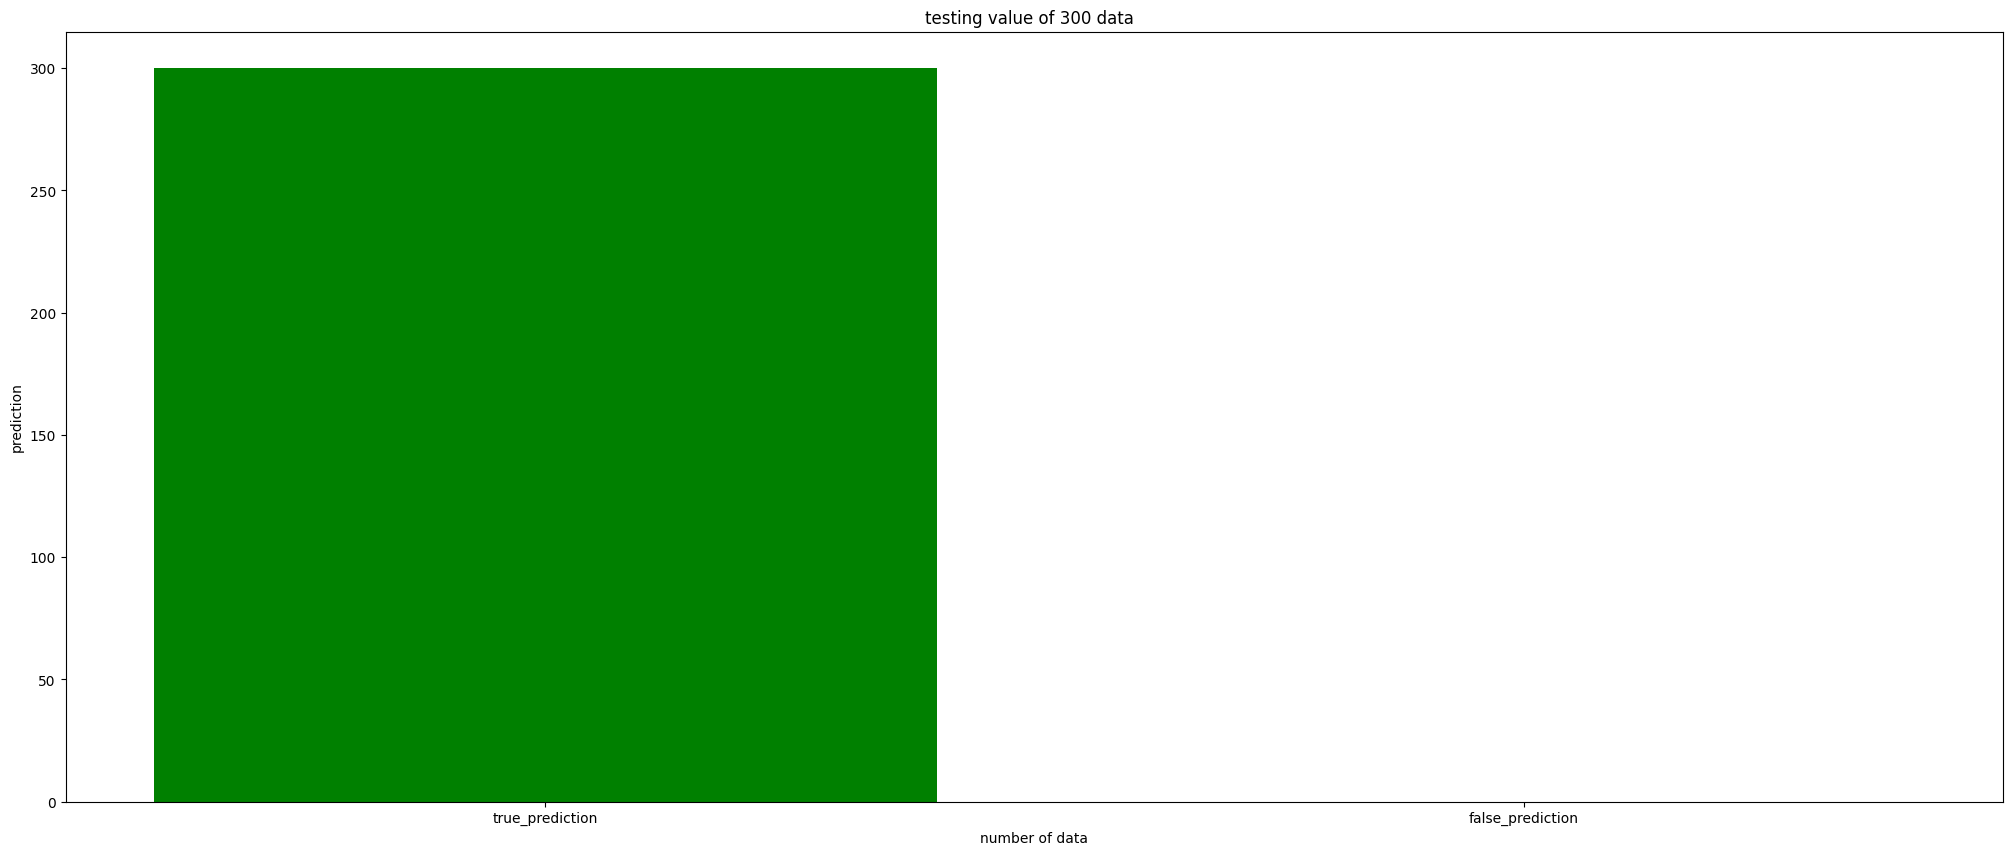

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
  
  
# Initialize the lists for X and Y

  

# print(df[20])
X = list(test_name)
Y = list(test_result)
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(25)  
# Plot the data using bar() method
plt.bar(X[0:25], Y[0:25], color='g')
plt.title("testing value of 500 data  ")
plt.xlabel("number of data")
plt.ylabel("prediction")

# Show the plot
plt.show()
fig.savefig('trending_topic.png', dpi='figure', format=None)

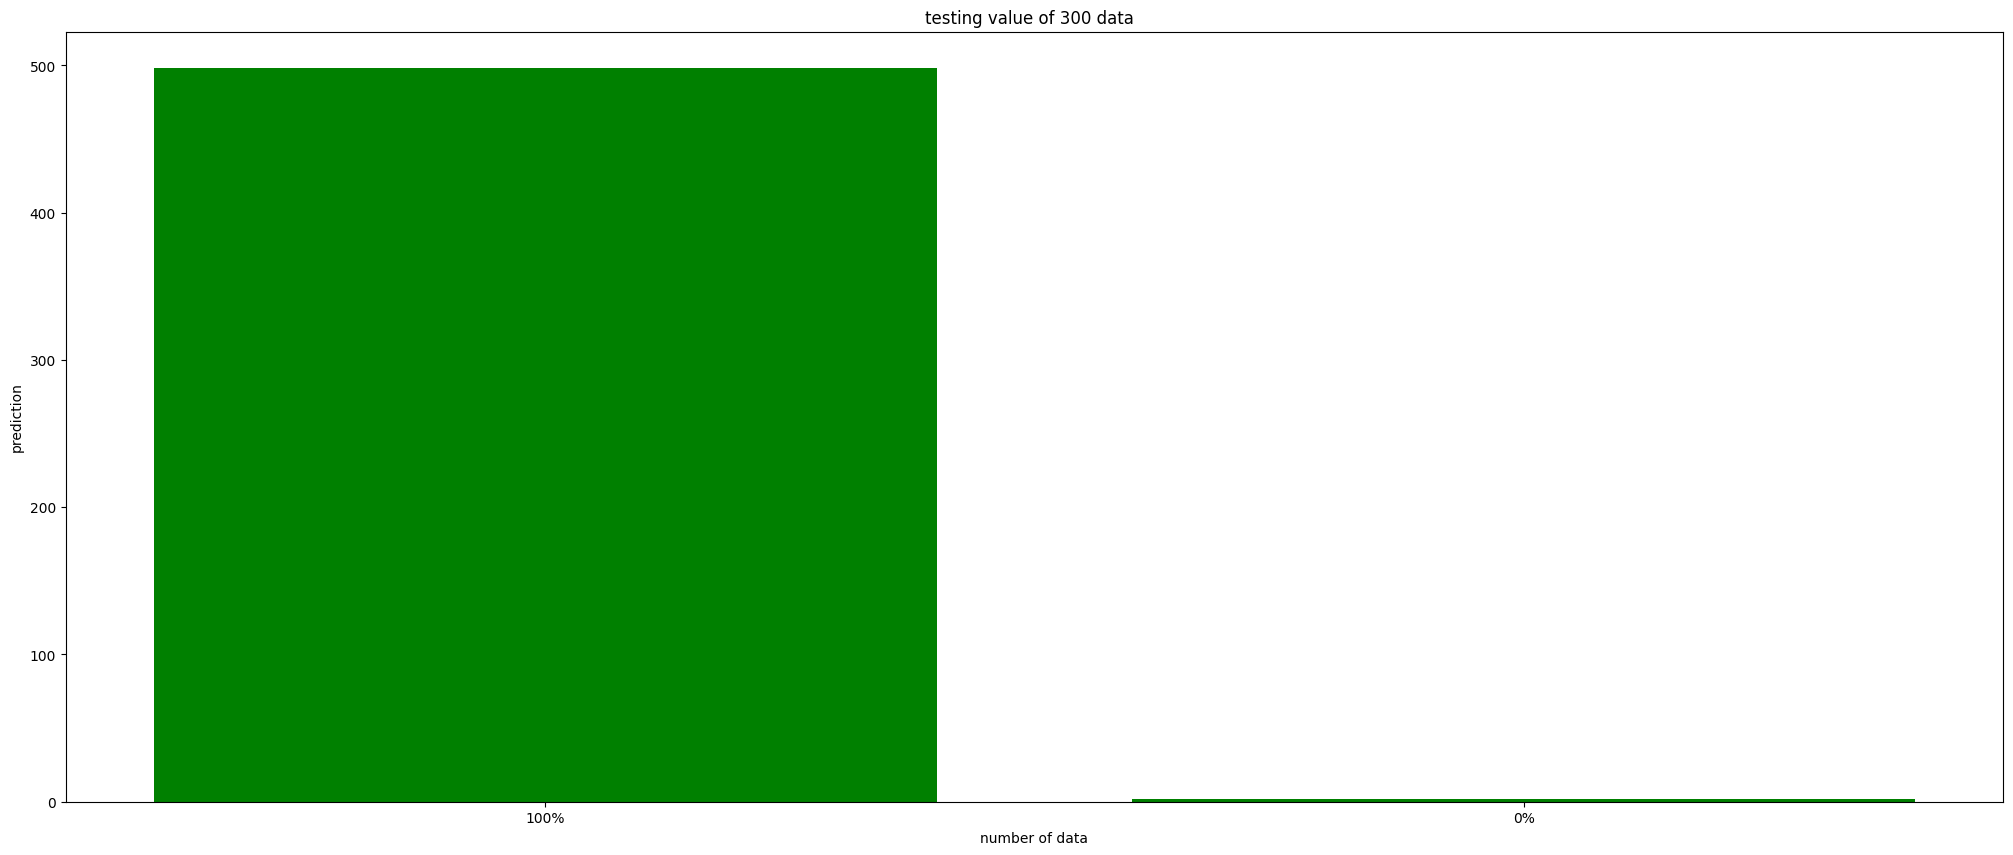

In [276]:

acc_predict=["100%","0%"]
acc_val=[500-accuracy,accuracy]
  

# print(df[20])
X = list(acc_predict)
Y = list(acc_val)
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(25)  
# Plot the data using bar() method
plt.bar(X[0:25], Y[0:25], color='g')
plt.title("testing value of 500 data  ")
plt.xlabel("number of data")
plt.ylabel("prediction")

# Show the plot
plt.show()
fig.savefig('trending_topic.png', dpi='figure', format=None)